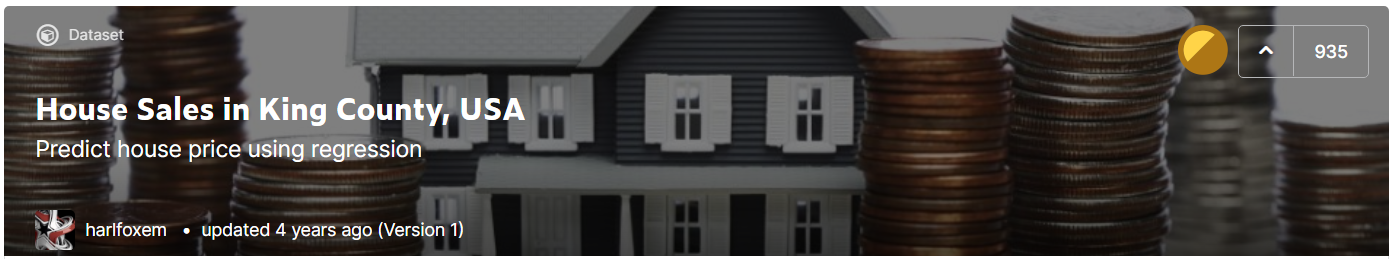


## This dataset contains house sale prices for King County, which includes Seattle. <br> It includes homes sold between May 2014 and May 2015.
##### Source: Kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Inport Data Science and Visualisation libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import folium

%matplotlib inline

In [2]:
# Import dataset
house_prices = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Project 1\Kings County Housing Prices\housesalesprediction\kc_house_data.csv")

In [3]:
# What does the data look like?
# Shape - Rows and Columns
house_prices.shape

(21613, 21)

In [4]:
# Print the header rows
house_prices.head(2)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  
0        5650  
1        7639  

[2 rows x 21 columns]

In [5]:
# Check the data type and are there any null values?
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Confirm there are no null values
house_prices.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

###  *** This dataset has values for all columns ***

In [7]:
# Some basic statistical details for the dataset
house_prices.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### The date column should be converted to datetime format:

In [8]:
# Markdown - Visualise the data
# Basic visualisations
## Factors that effect price - are the variables normalised?

Text(0, 0.5, 'Frequency')

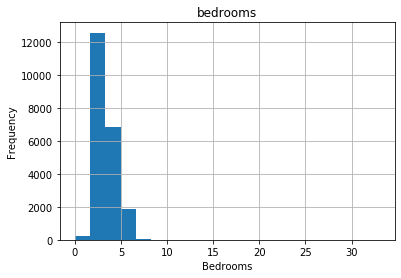

In [9]:
# How many bedrooms do houses have in King County?
house_prices.hist("bedrooms",bins=20)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

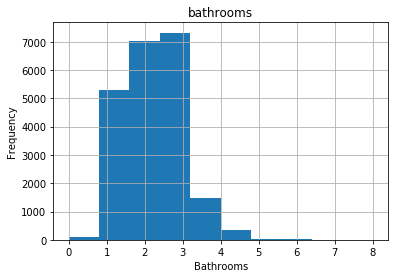

In [10]:
house_prices.hist("bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

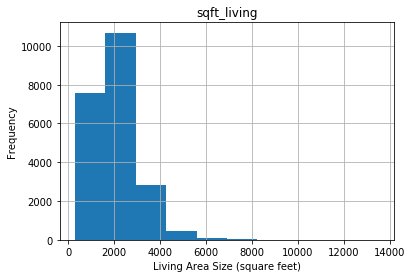

In [11]:
house_prices.hist("sqft_living")
plt.xlabel("Living Area Size (square feet)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

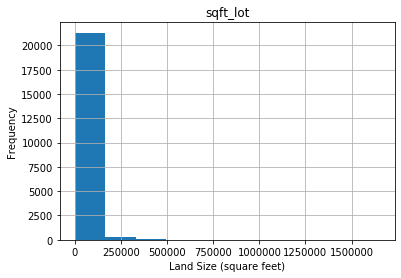

In [12]:
# Are there any very big housing blocks in this dataset?
house_prices.hist("sqft_lot")
plt.xlabel("Land Size (square feet)")
plt.ylabel("Frequency")

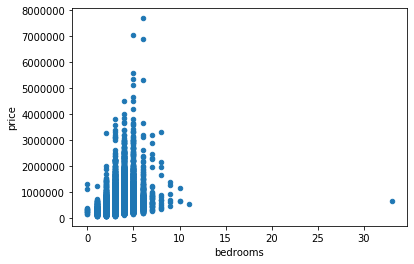

In [13]:
# Can a scatter plot show possible correlation?
# Is there a relationship between bedrooms and price?
house_prices.plot.scatter(x="bedrooms", y="price")

### ** No clear relationship between no. of bedrooms and house price ** 
### How are all the property attributes related to the house price?


In [14]:
# What are the relationships between variables? Create a Correlation Matrix:
correlation_matrix = house_prices.corr()
correlation_matrix.head(6)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id           1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price       -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms     0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms    0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot    -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   

               floors  waterfront      view  condition     grade  sqft_above  \
id           0.018525   -0.002721  0.011592  -0.023783  0.008130   -0.010842   
price        0.256794    0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms     0.175429   -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms    0.500653    0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living  0.353949    0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot    -0.005201    0.021604  0.074710  -0.008958  0.113621    0.183512   

             sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id               -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price             0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms          0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms         0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living       0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot          0.015286  0.053080      0.007644 -0.129574 -0.085683   

                 long  sqft_living15  sqft_lot15  
id           0.020799      -0.002901   -0.138798  
price        0.021626       0.585379    0.082447  
bedrooms     0.129473       0.391638    0.029244  
bathrooms    0.223042       0.568634    0.087175  
sqft_living  0.240223       0.756420    0.183286  
sqft_lot     0.229521       0.144608    0.718557

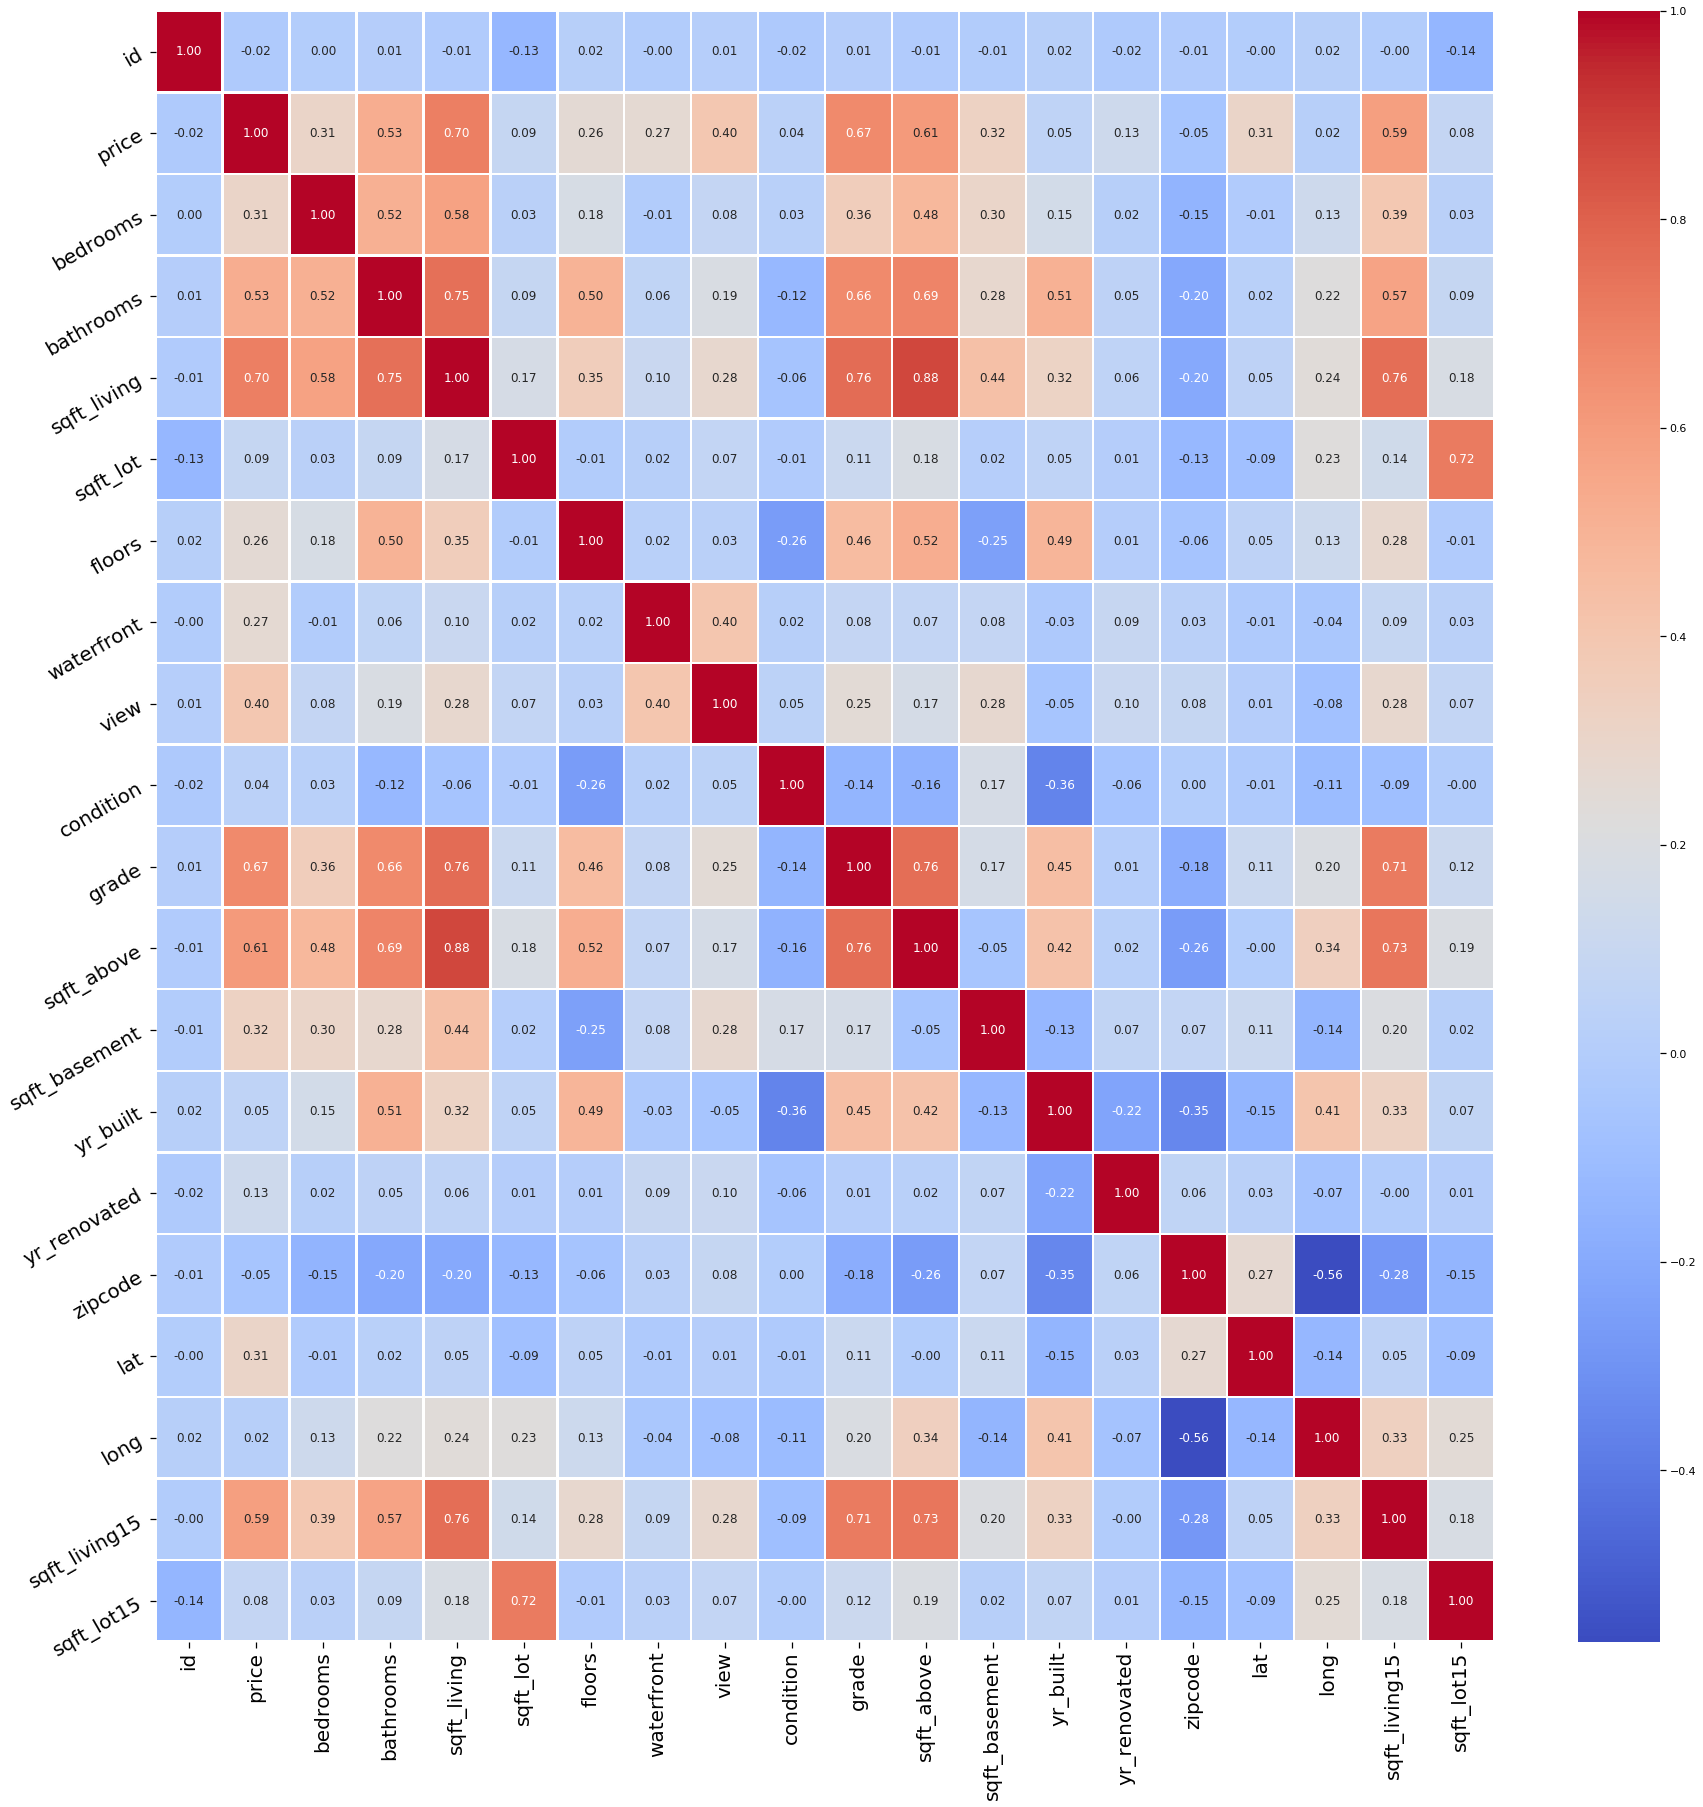

In [15]:
# What does the Correlation Matrix look like?
# heatmap of correlation among various attributes
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(correlation_matrix, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

In [16]:
# Markup with 5 variables

In [17]:
# Check 5 attributes (columns) with high correlation
price_attributes = house_prices[["price","bathrooms","sqft_living","view","grade","sqft_above","sqft_living15"]].copy()

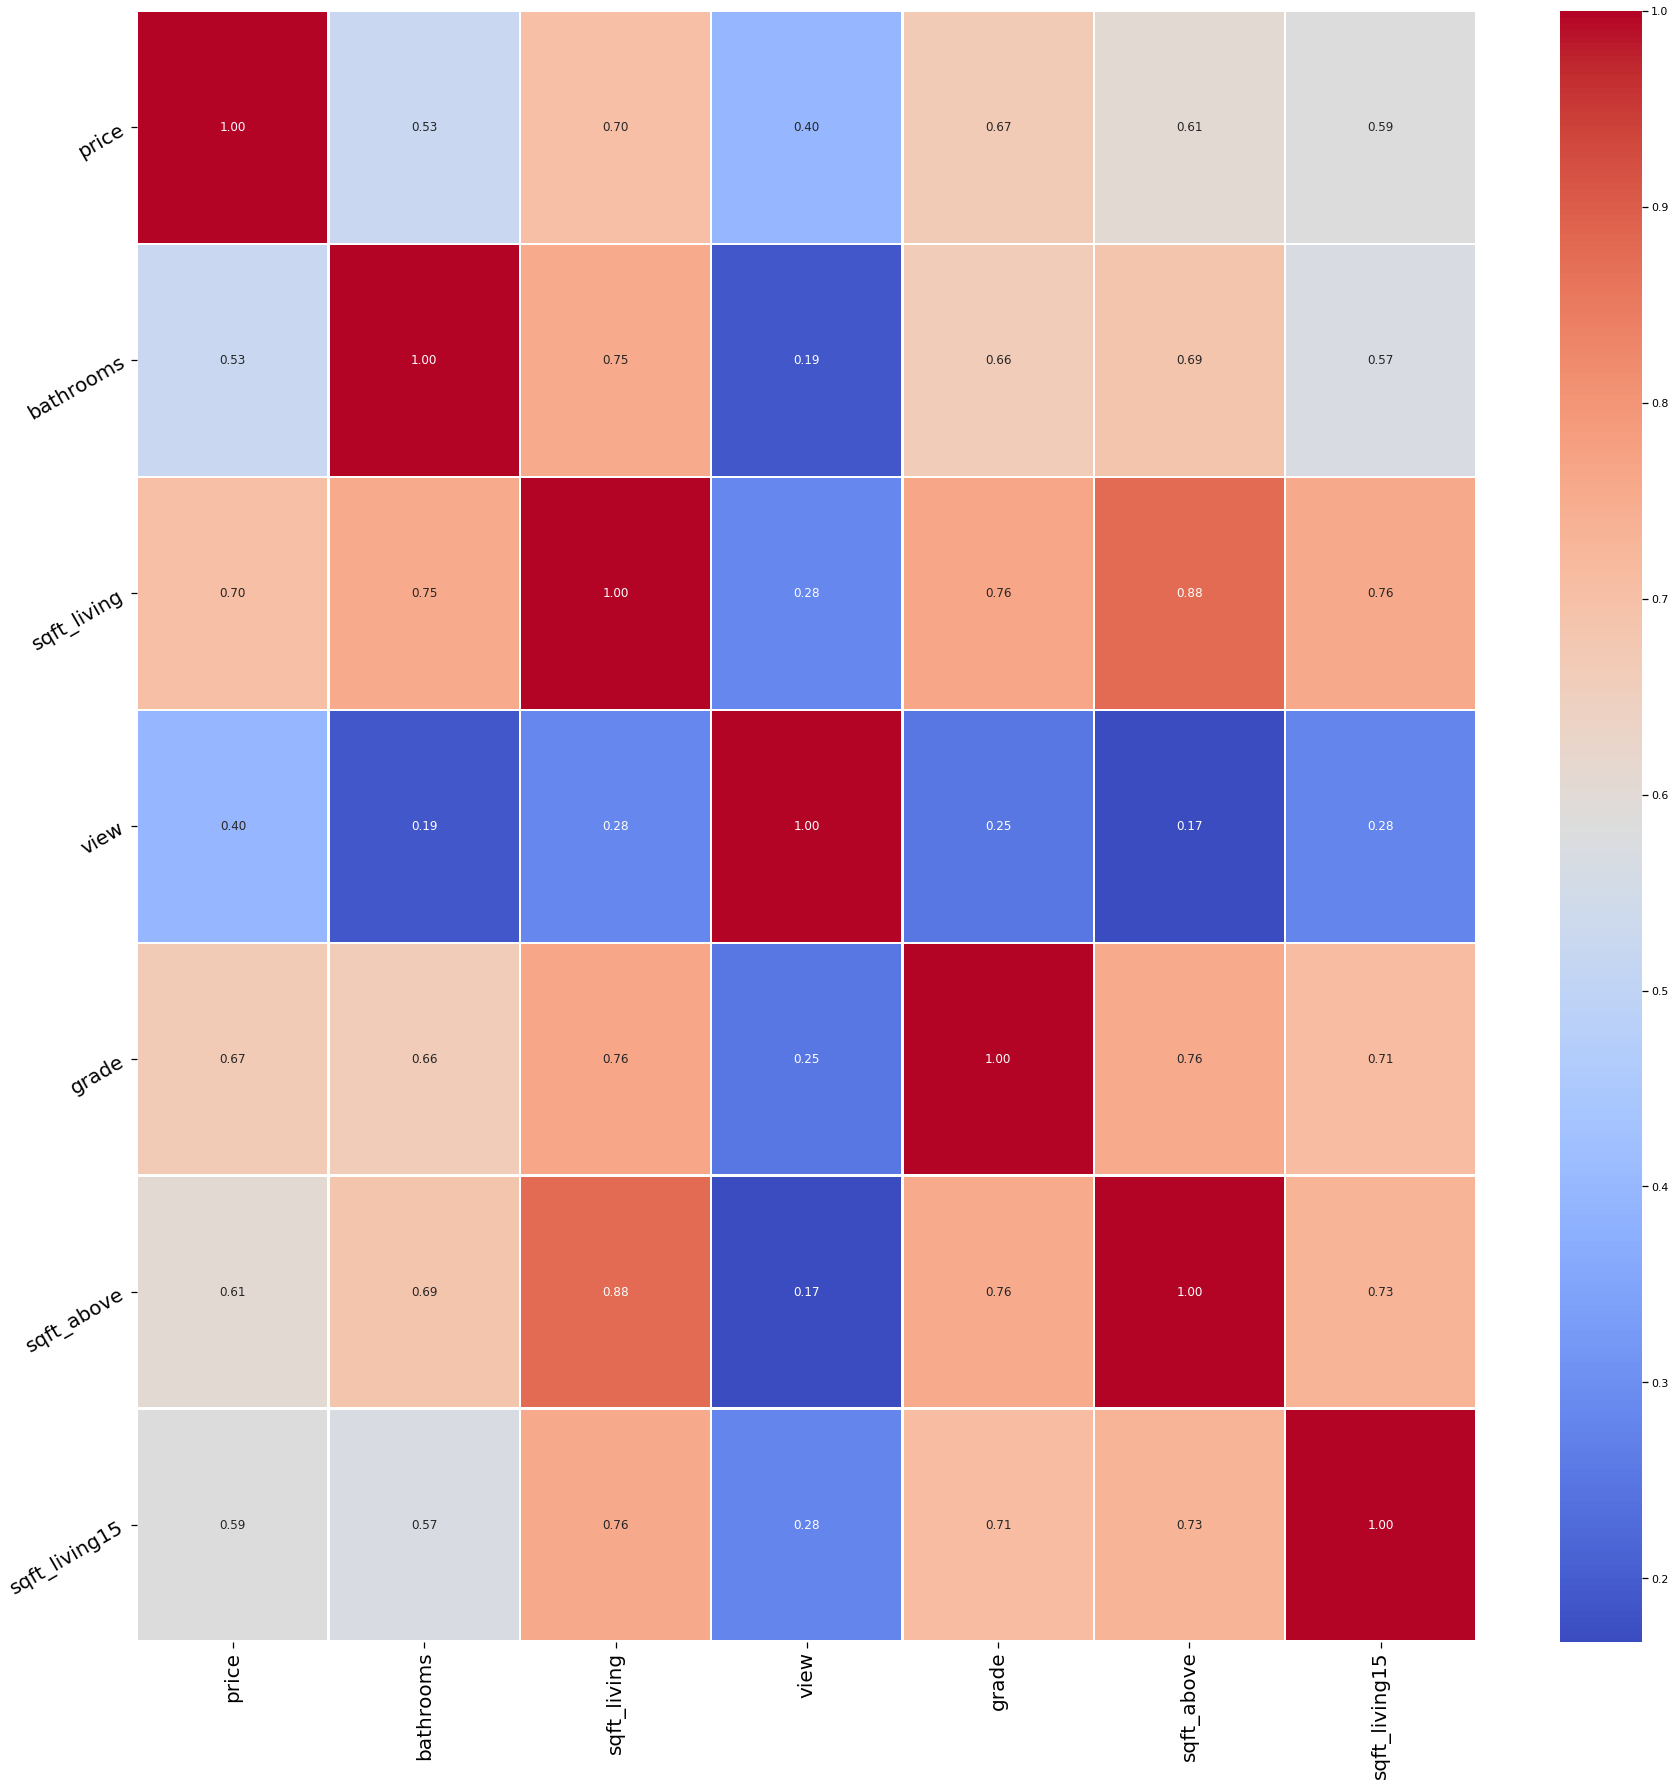

In [18]:
# Check the variable in a new heat map
# with bathrooms, sqft_living, view, grade, sqft_above, sqft_living15
correlation_matrix = price_attributes.corr()

# heatmap of correlation among various attributes
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(correlation_matrix, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

In [19]:
# Describe the 6 major attributes that effect price
price_attributes.describe()

price     bathrooms   sqft_living          view         grade  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.400881e+05      2.114757   2079.899736      0.234303      7.656873   
std    3.671272e+05      0.770163    918.440897      0.766318      1.175459   
min    7.500000e+04      0.000000    290.000000      0.000000      1.000000   
25%    3.219500e+05      1.750000   1427.000000      0.000000      7.000000   
50%    4.500000e+05      2.250000   1910.000000      0.000000      7.000000   
75%    6.450000e+05      2.500000   2550.000000      0.000000      8.000000   
max    7.700000e+06      8.000000  13540.000000      4.000000     13.000000   

         sqft_above  sqft_living15  
count  21613.000000   21613.000000  
mean    1788.390691    1986.552492  
std      828.090978     685.391304  
min      290.000000     399.000000  
25%     1190.000000    1490.000000  
50%     1560.000000    1840.000000  
75%     2210.000000    2360.000000  
max     9410.000000    6210.000000

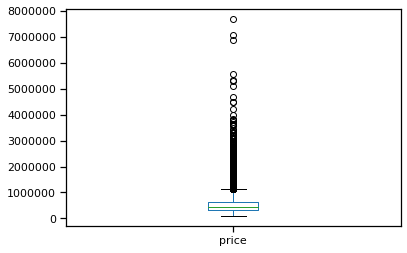

In [20]:
# Box Plot to show the normalisation of the data
price_attributes["price"].plot.box(True)

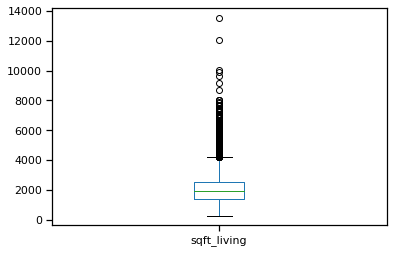

In [21]:
price_attributes["sqft_living"].plot.box(True)

## Conclusion: This dataset will require further preparation before use for ML